In [30]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('ingredient_df_with_recipenames.csv')

In [3]:
pcadata = pd.read_csv('PCA_85var_701_components_final.csv')

In [7]:
pcadata

,id,cuisine,ingredients,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,...,PC 692,PC 693,PC 694,PC 695,PC 696,PC 697,PC 698,PC 699,PC 700,PC 701
0,0,spanish,"['mussels', 'ground black pepper', 'garlic clo...",-0.177368,-0.649818,-0.986525,0.463043,0.291983,0.388125,0.345283,...,0.003452,-0.001485,0.009037,0.062071,-0.020208,-0.009532,-0.008305,0.047556,0.002626,0.067919
1,1,mexican,"['tomatoes', 'diced red onions', 'paprika', 's...",0.676345,-0.387781,0.147850,-0.412218,0.233093,-0.761947,-0.003279,...,0.017157,0.055352,0.038733,-0.042137,0.009649,0.005328,-0.028132,0.037405,-0.020440,0.012754
2,2,french,"['chicken broth', 'truffles', 'pimentos', 'gre...",0.283816,0.724659,-0.053123,-0.407716,-0.122488,-0.189030,-0.160060,...,0.040174,0.045518,0.019364,0.016291,-0.026897,0.004641,-0.019139,-0.040155,-0.015307,0.003971
3,3,chinese,"['fresh ginger', 'sesame oil', 'frozen peas', ...",-0.520112,-0.365672,0.974228,-0.255020,0.698474,-0.023899,0.589925,...,0.004299,0.003738,0.005825,0.010058,-0.008085,-0.001190,0.015797,0.006265,0.003344,-0.001057
4,4,italian,"['orange peel', 'cookies', 'vanilla ice cream'...",-0.605602,-0.029812,-0.133223,-0.144420,-0.082266,-0.204736,-0.236791,...,0.122229,-0.058159,0.017819,0.156949,0.039280,-0.131075,0.167701,0.074508,-0.101634,-0.003234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,49713,southern_us,"['black pepper', 'large eggs', 'creole seasoni...",-0.515928,0.211335,-0.274143,-0.173774,-0.146618,-0.021561,-0.056383,...,-0.043781,-0.032044,-0.008372,0.032716,-0.000107,-0.004174,-0.001669,-0.035926,-0.011982,0.012059
49714,49714,irish,"['chopped fresh thyme', 'chopped fresh sage', ...",0.072157,-0.812771,0.522734,-0.545319,-0.512742,0.348985,0.181814,...,0.089029,0.082392,-0.006501,0.096700,0.015236,0.027316,0.138846,-0.039831,0.081992,0.132200
49715,49715,filipino,"['crumbled blue cheese', 'buffalo sauce', 'avo...",-0.595952,-0.152223,-0.180473,-0.112066,-0.071403,-0.463862,-0.267439,...,0.025055,-0.000451,0.018486,0.001501,0.019119,0.009886,-0.008510,0.008197,-0.002649,0.039967
49716,49716,indian,"['water', 'cinnamon', 'garlic', 'cardamom', 'o...",0.996633,-0.449822,1.209181,0.081086,-0.445371,0.137334,-0.423689,...,0.041815,-0.027106,-0.008656,-0.054063,-0.059066,0.006595,-0.026667,-0.055630,-0.089340,0.006316


In the context of clustering PCA-transformed recipe data where normalization is not desired, switching from K-Nearest Neighbors (KNN) to K-Means offers several advantages, particularly suited to the inherent characteristics of such high-dimensional embeddings. KNN, primarily a classification and regression tool, can be adapted for clustering by building a neighbor graph and defining clusters as connected components. However, this adaptation is not straightforward and often not as effective, especially in higher dimensions where the concept of "nearest neighbors" becomes less meaningful due to the curse of dimensionality.

K-Means, on the other hand, is explicitly designed for clustering. It is particularly effective when the clusters are roughly hyper-spherical and of similar density, which aligns well with the distribution characteristics often found in PCA-reduced spaces. Unlike the adapted use of KNN, K-Means directly optimizes cluster centroids and assignments, making it computationally more efficient and straightforward to implement. K-Means also scales relatively well to high-dimensional data, provided the number of clusters isn't too large, making it a more suitable choice for large datasets like those typically found in recipe recommendation systems.

Furthermore, K-Means provides a clear methodological advantage in its sensitivity to the mean structure of the data, which is beneficial for PCA-transformed datasets where principal components are aligned with the directions of maximum variance. This property allows K-Means to effectively capture the natural clustering structure implied by the principal components, without the need for the distance threshold tuning required by KNN-based clustering adaptations. Therefore, K-Means not only simplifies the clustering process but also enhances the potential for discovering meaningful, well-separated clusters that can significantly improve the performance of a recommendation system based on recipe similarities.

In [11]:
clustercols = [col for col in pcadata if 'PC' in col]

In [ ]:
pcadata[clustercols]

/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

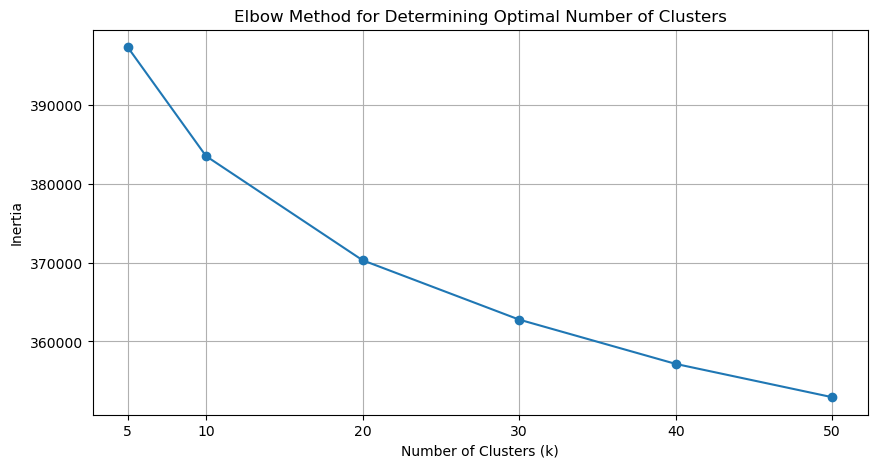

In [15]:
# K-means Clustering on the Data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clustercols = [col for col in pcadata.columns if 'PC' in col]  

# Define range of potential clusters
num_clusters = [5, 10, 20, 30, 40, 50]
inertias = []  # to store inertia values for each k

for k in num_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pcadata[clustercols])  # Fit the model on the selected PCA columns
    inertias.append(model.inertia_)  # Append the inertia of the model

# Plotting the inertia values to find the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(num_clusters, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

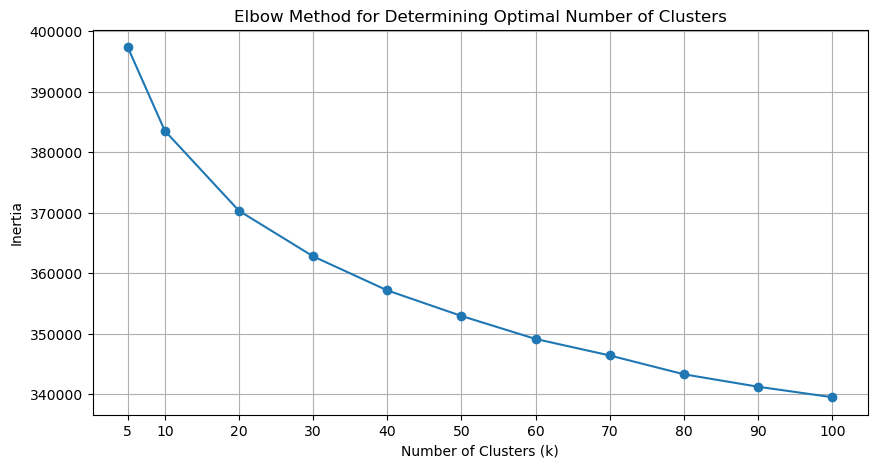

In [17]:
# Define range of potential clusters
num_clusters = [5, 10, 20, 30, 40, 50,60,70,80,90,100]
inertias = []  # to store inertia values for each k

for k in num_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pcadata[clustercols])  # Fit the model on the selected PCA columns
    inertias.append(model.inertia_)  # Append the inertia of the model

# Plotting the inertia values to find the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(num_clusters, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


In [18]:
inertias

[397363.84203119675,
 383538.4409764155,
 370305.0571096518,
 362766.4026616942,
 357138.46950048907,
 352908.4350475115,
 349103.82597933477,
 346374.7222183881,
 343261.26988641283,
 341203.12403723167,
 339469.1876330441]

Elbow Point (First Derivative Method): 10
Elbow Point (Second Derivative Method): 80


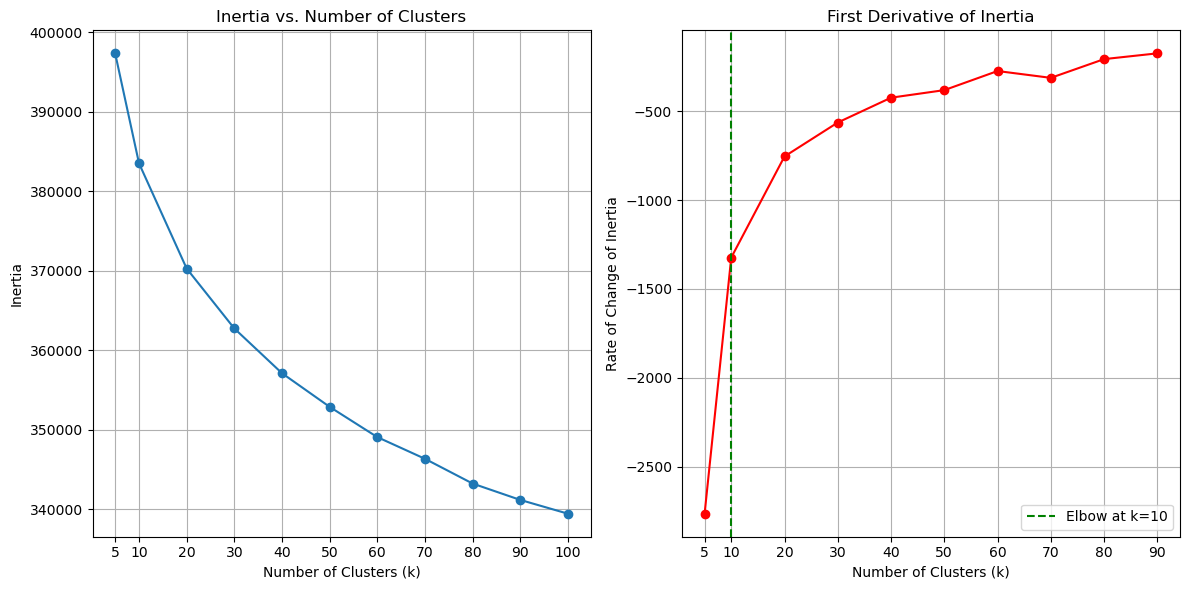

In [19]:
# Calculate the first derivative of the inertias (rate of change of inertia)
first_derivative = np.diff(inertias) / np.diff(num_clusters)

# Optionally, calculate the second derivative (acceleration of the rate of change)
second_derivative = np.diff(first_derivative) / np.diff(num_clusters[:-1])

# Identify the elbow point: the cluster size right before the second derivative increases
# This method uses the first derivative:
elbow_point = num_clusters[np.argmin(first_derivative) + 1]  # +1 because diff is one element shorter

# This method uses the second derivative, which highlights the inflection point more clearly:
if len(second_derivative) > 0:  # ensure there are at least two points to differentiate
    elbow_point_second_deriv = num_clusters[np.argmin(second_derivative) + 2]  # +2 accounts for the double differentiation shortening
else:
    elbow_point_second_deriv = elbow_point  # fallback in case of insufficient data points

print("Elbow Point (First Derivative Method):", elbow_point)
print("Elbow Point (Second Derivative Method):", elbow_point_second_deriv)

# Plotting for visualization (optional if not needed)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(num_clusters, inertias, marker='o', linestyle='-')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.grid(True)

plt.subplot(122)
plt.plot(num_clusters[:-1], first_derivative, marker='o', linestyle='-', color='r')
plt.axvline(x=elbow_point, color='g', linestyle='--', label=f'Elbow at k={elbow_point}')
plt.title('First Derivative of Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Rate of Change of Inertia')
plt.xticks(num_clusters[:-1])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

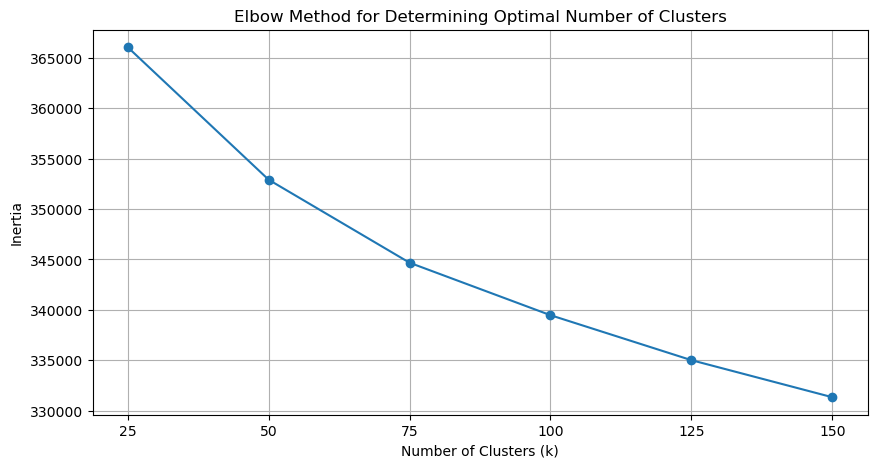

In [20]:
# Define range of potential clusters
num_clusters = [25,50,75,100,125,150]
inertias = []  # to store inertia values for each k

for k in num_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pcadata[clustercols])  # Fit the model on the selected PCA columns
    inertias.append(model.inertia_)  # Append the inertia of the model

# Plotting the inertia values to find the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(num_clusters, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


Elbow Point (First Derivative Method): 50
Elbow Point (Second Derivative Method): 125


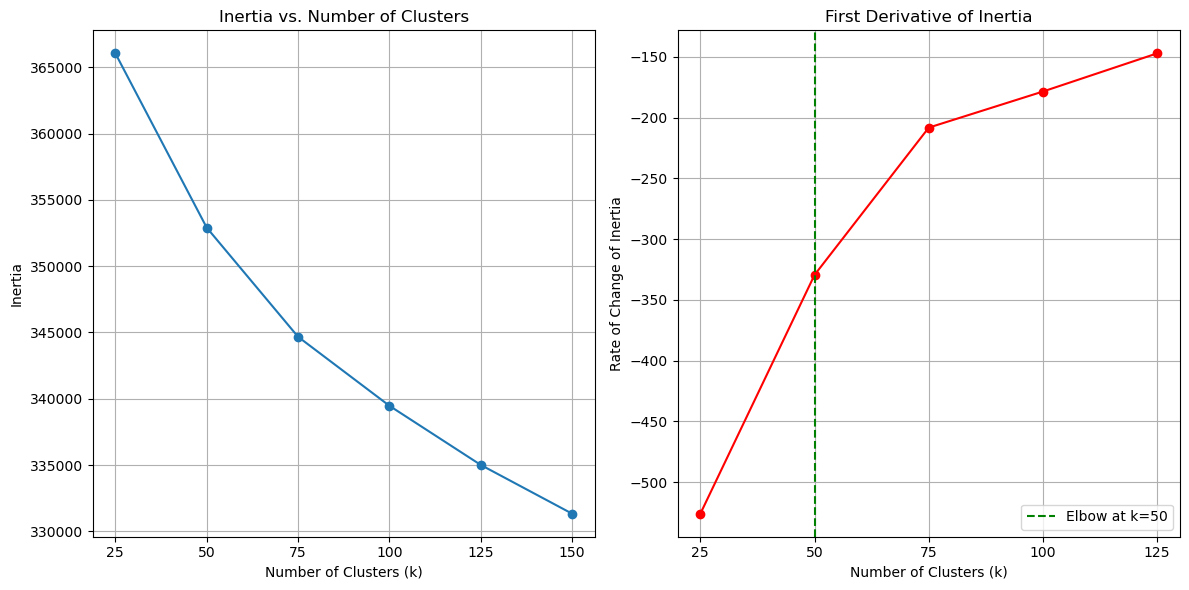

In [21]:
# Calculate the first derivative of the inertias (rate of change of inertia)
first_derivative = np.diff(inertias) / np.diff(num_clusters)

# Optionally, calculate the second derivative (acceleration of the rate of change)
second_derivative = np.diff(first_derivative) / np.diff(num_clusters[:-1])

# Identify the elbow point: the cluster size right before the second derivative increases
# This method uses the first derivative:
elbow_point = num_clusters[np.argmin(first_derivative) + 1]  # +1 because diff is one element shorter

# This method uses the second derivative, which highlights the inflection point more clearly:
if len(second_derivative) > 0:  # ensure there are at least two points to differentiate
    elbow_point_second_deriv = num_clusters[np.argmin(second_derivative) + 2]  # +2 accounts for the double differentiation shortening
else:
    elbow_point_second_deriv = elbow_point  # fallback in case of insufficient data points

print("Elbow Point (First Derivative Method):", elbow_point)
print("Elbow Point (Second Derivative Method):", elbow_point_second_deriv)

# Plotting for visualization (optional if not needed)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(num_clusters, inertias, marker='o', linestyle='-')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.grid(True)

plt.subplot(122)
plt.plot(num_clusters[:-1], first_derivative, marker='o', linestyle='-', color='r')
plt.axvline(x=elbow_point, color='g', linestyle='--', label=f'Elbow at k={elbow_point}')
plt.title('First Derivative of Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Rate of Change of Inertia')
plt.xticks(num_clusters[:-1])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Well try k = 50. as a number. based on this and on loose visual

In [22]:

n_clusters = 50

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pcadata['Cluster'] = kmeans.fit_predict(pcadata[clustercols])



/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


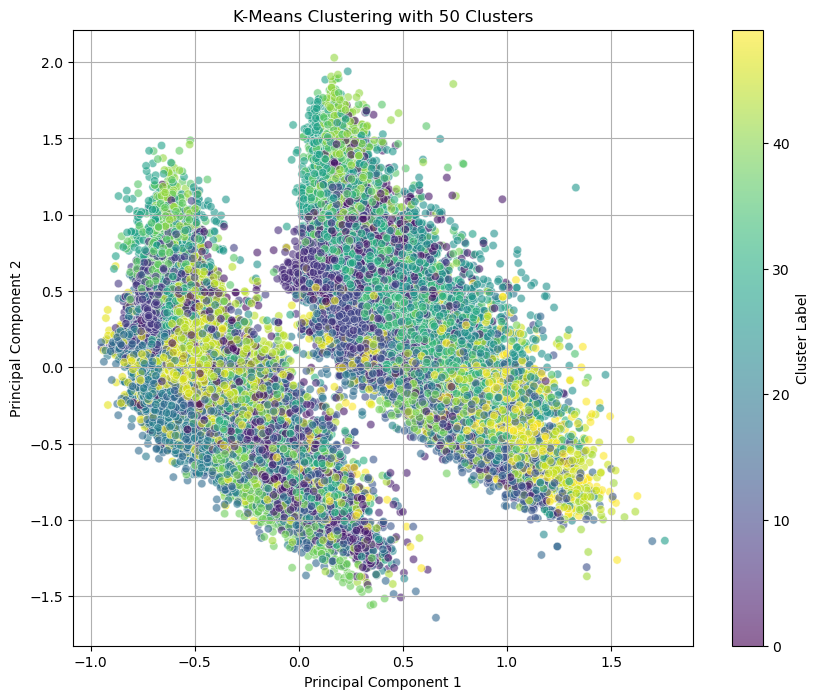

In [ ]:
from sklearn.decomposition import PCA  # Assuming PCA has been applied, if not you'll apply it

# For plotting we reduce the dimensions to 2D using PCA, if not already to 2 principal components
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(pcadata[clustercols])
pcadata['PC1_2D'] = principal_components[:, 0]
pcadata['PC2_2D'] = principal_components[:, 1]

# Plotting the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pcadata['PC1_2D'], pcadata['PC2_2D'], c=pcadata['Cluster'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


The second PCA is just to get a feel for how well 50 components has fit our data. Have to do some digging to see what we have discovered.

In [32]:
pcadata

,id,cuisine,ingredients,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,...,PC 695,PC 696,PC 697,PC 698,PC 699,PC 700,PC 701,Cluster,PC1_2D,PC2_2D
0,0,spanish,"['mussels', 'ground black pepper', 'garlic clo...",-0.177368,-0.649818,-0.986525,0.463043,0.291983,0.388125,0.345283,...,0.062071,-0.020208,-0.009532,-0.008305,0.047556,0.002626,0.067919,40,-0.177347,-0.649725
1,1,mexican,"['tomatoes', 'diced red onions', 'paprika', 's...",0.676345,-0.387781,0.147850,-0.412218,0.233093,-0.761947,-0.003279,...,-0.042137,0.009649,0.005328,-0.028132,0.037405,-0.020440,0.012754,16,0.676322,-0.387781
2,2,french,"['chicken broth', 'truffles', 'pimentos', 'gre...",0.283816,0.724659,-0.053123,-0.407716,-0.122488,-0.189030,-0.160060,...,0.016291,-0.026897,0.004641,-0.019139,-0.040155,-0.015307,0.003971,24,0.283871,0.724831
3,3,chinese,"['fresh ginger', 'sesame oil', 'frozen peas', ...",-0.520112,-0.365672,0.974228,-0.255020,0.698474,-0.023899,0.589925,...,0.010058,-0.008085,-0.001190,0.015797,0.006265,0.003344,-0.001057,17,-0.520197,-0.366072
4,4,italian,"['orange peel', 'cookies', 'vanilla ice cream'...",-0.605602,-0.029812,-0.133223,-0.144420,-0.082266,-0.204736,-0.236791,...,0.156949,0.039280,-0.131075,0.167701,0.074508,-0.101634,-0.003234,46,-0.605608,-0.029798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,49713,southern_us,"['black pepper', 'large eggs', 'creole seasoni...",-0.515928,0.211335,-0.274143,-0.173774,-0.146618,-0.021561,-0.056383,...,0.032716,-0.000107,-0.004174,-0.001669,-0.035926,-0.011982,0.012059,2,-0.515988,0.211247
49714,49714,irish,"['chopped fresh thyme', 'chopped fresh sage', ...",0.072157,-0.812771,0.522734,-0.545319,-0.512742,0.348985,0.181814,...,0.096700,0.015236,0.027316,0.138846,-0.039831,0.081992,0.132200,5,0.072159,-0.812852
49715,49715,filipino,"['crumbled blue cheese', 'buffalo sauce', 'avo...",-0.595952,-0.152223,-0.180473,-0.112066,-0.071403,-0.463862,-0.267439,...,0.001501,0.019119,0.009886,-0.008510,0.008197,-0.002649,0.039967,14,-0.595976,-0.152276
49716,49716,indian,"['water', 'cinnamon', 'garlic', 'cardamom', 'o...",0.996633,-0.449822,1.209181,0.081086,-0.445371,0.137334,-0.423689,...,-0.054063,-0.059066,0.006595,-0.026667,-0.055630,-0.089340,0.006316,32,0.996651,-0.449699


In [26]:
pcadata.cuisine.value_counts()

cuisine
italian         8316
mexican         6947
southern_us     4813
indian          3487
french          3164
chinese         3162
cajun_creole    2048
thai            2030
japanese        1932
greek           1699
spanish         1508
korean          1340
vietnamese      1325
moroccan        1323
british         1284
filipino        1270
irish           1138
jamaican         989
russian          985
brazilian        958
Name: count, dtype: int64

In [33]:
n_clusters = 80

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pcadata['Cluster2'] = kmeans.fit_predict(pcadata[clustercols])


/Users/ellisony/anaconda3/envs/work3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


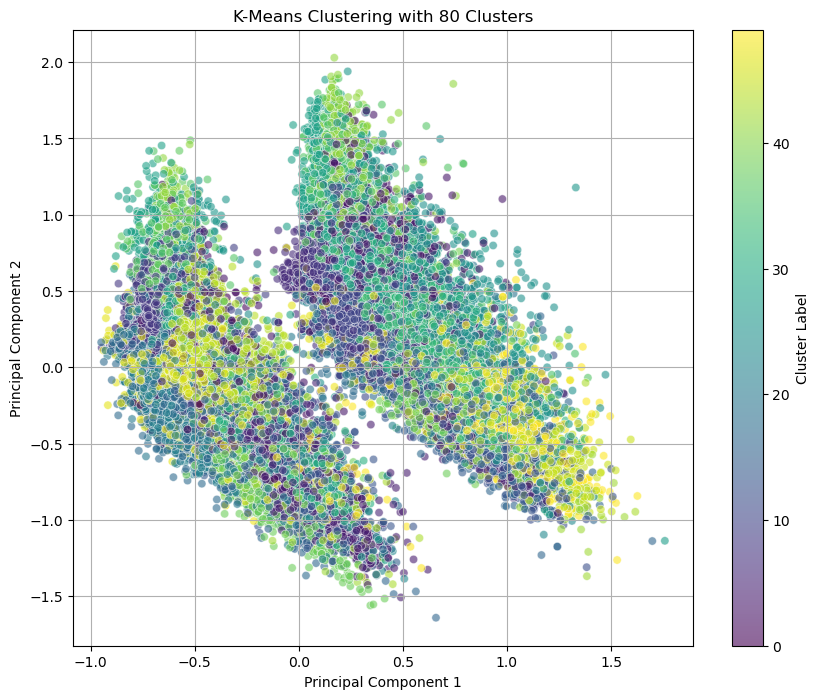

In [ ]:

# For plotting we reduce the dimensions to 2D using PCA, if not already to 2 principal components
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(pcadata[clustercols])
pcadata['PC1_2D_80'] = principal_components[:, 0]
pcadata['PC2_2D_80'] = principal_components[:, 1]

# Plotting the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pcadata['PC1_2D_80'], pcadata['PC2_2D_80'], c=pcadata['Cluster'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [36]:
pcadata.columns

Index(['id', 'cuisine', 'ingredients', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5',
       'PC 6', 'PC 7',
       ...
       'PC 698', 'PC 699', 'PC 700', 'PC 701', 'Cluster', 'PC1_2D', 'PC2_2D',
       'Cluster2', 'PC1_2D_80', 'PC2_2D_80'],
      dtype='object', length=710)

In [37]:
# Drop cols used to vizualize components and rename for exploration

pcadata.rename(columns={'Cluster': 'Cluster50', 'Cluster2': 'Cluster80'}, inplace=True)

pcadata.drop(['PC1_2D', 'PC2_2D','PC1_2D_80', 'PC2_2D_80'], axis=1, inplace=True)  # axis=1 denotes that we are referring to a column, not a row

In [38]:
pcadata

,id,cuisine,ingredients,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,...,PC 694,PC 695,PC 696,PC 697,PC 698,PC 699,PC 700,PC 701,Cluster50,Cluster80
0,0,spanish,"['mussels', 'ground black pepper', 'garlic clo...",-0.177368,-0.649818,-0.986525,0.463043,0.291983,0.388125,0.345283,...,0.009037,0.062071,-0.020208,-0.009532,-0.008305,0.047556,0.002626,0.067919,40,12
1,1,mexican,"['tomatoes', 'diced red onions', 'paprika', 's...",0.676345,-0.387781,0.147850,-0.412218,0.233093,-0.761947,-0.003279,...,0.038733,-0.042137,0.009649,0.005328,-0.028132,0.037405,-0.020440,0.012754,16,75
2,2,french,"['chicken broth', 'truffles', 'pimentos', 'gre...",0.283816,0.724659,-0.053123,-0.407716,-0.122488,-0.189030,-0.160060,...,0.019364,0.016291,-0.026897,0.004641,-0.019139,-0.040155,-0.015307,0.003971,24,27
3,3,chinese,"['fresh ginger', 'sesame oil', 'frozen peas', ...",-0.520112,-0.365672,0.974228,-0.255020,0.698474,-0.023899,0.589925,...,0.005825,0.010058,-0.008085,-0.001190,0.015797,0.006265,0.003344,-0.001057,17,35
4,4,italian,"['orange peel', 'cookies', 'vanilla ice cream'...",-0.605602,-0.029812,-0.133223,-0.144420,-0.082266,-0.204736,-0.236791,...,0.017819,0.156949,0.039280,-0.131075,0.167701,0.074508,-0.101634,-0.003234,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49713,49713,southern_us,"['black pepper', 'large eggs', 'creole seasoni...",-0.515928,0.211335,-0.274143,-0.173774,-0.146618,-0.021561,-0.056383,...,-0.008372,0.032716,-0.000107,-0.004174,-0.001669,-0.035926,-0.011982,0.012059,2,2
49714,49714,irish,"['chopped fresh thyme', 'chopped fresh sage', ...",0.072157,-0.812771,0.522734,-0.545319,-0.512742,0.348985,0.181814,...,-0.006501,0.096700,0.015236,0.027316,0.138846,-0.039831,0.081992,0.132200,5,40
49715,49715,filipino,"['crumbled blue cheese', 'buffalo sauce', 'avo...",-0.595952,-0.152223,-0.180473,-0.112066,-0.071403,-0.463862,-0.267439,...,0.018486,0.001501,0.019119,0.009886,-0.008510,0.008197,-0.002649,0.039967,14,69
49716,49716,indian,"['water', 'cinnamon', 'garlic', 'cardamom', 'o...",0.996633,-0.449822,1.209181,0.081086,-0.445371,0.137334,-0.423689,...,-0.008656,-0.054063,-0.059066,0.006595,-0.026667,-0.055630,-0.089340,0.006316,32,51


In [40]:
pcadata.to_csv('pca_kmeans_data.csv', index=False)